In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Load the dataset
file_path = "C:\Users\HP\Downloads\heart.csv" # Ensure the file is in the same directory
df = pd.read_csv(file_path)
 
# Display all columns
print("Dataset Columns:\n", df.columns)
 
# Display first and last few rows
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())
# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

Dataset Columns:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0      1.0      168      0      1.0      2   
1   53    1   0       140   203    1      0.0      155      1      3.1      0   
2   70    1   0       145   174    0      1.0      125      1      2.6      0   
3   61    1   0       148   203    0      1.0      161      0      0.0      2   
4   62    0   0       138   294    1      1.0      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Last 5 rows:
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0      1.0      164      1      0.0   
1021   60    1   0 

In [14]:
# Check for missing values
print("\nMissing values before imputation:\n", df.isnull().sum())
 
# Handle missing values with mean imputation
df.fillna(df.mean(), inplace=True)
 
# Verify missing values are handled
print("\nMissing values after imputation:\n", df.isnull().sum())
 
# Check shape before outlier removal
print("\nData shape before outlier removal:", df.shape)
 
# Removing outliers for 'chol' using IQR
Q1 = df["chol"].quantile(0.25)
Q3 = df["chol"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["chol"] >= Q1 - 1.5 * IQR) & (df["chol"] <= Q3 + 1.5 * IQR)]
 
# Check shape after outlier removal
print("\nData shape after outlier removal:", df.shape)


Missing values before imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data shape before outlier removal: (1025, 14)

Data shape after outlier removal: (1009, 14)


In [15]:
# Compute required statistics
print("\nMean, Median, and Standard Deviation of Cholesterol:")
print("Mean:", df["chol"].mean(), "Median:", df["chol"].median(), "Std Dev:", df["chol"].std())
 
print("\nMean Blood Pressure for Patients With and Without Heart Disease:")
print(df.groupby("target")["trestbps"].mean())
 
print("\nMax and Min of Maximum Heart Rate (thalach):")
print("Max:", df["thalach"].max(), "Min:", df["thalach"].min())
 
# Sorting and searching
df_sorted = df.sort_values(by="chol", ascending=False)
print("\nTop 5 patients with highest cholesterol:\n", df_sorted.head())
 
high_chol_patients = df[df["chol"] > 300]
print("\nPatients with cholesterol > 300 mg/dL:\n", high_chol_patients)
 
elderly_abnormal_ecg = df[(df["age"] > 60) & (df["restecg"] > 0)]
print("\nPatients older than 60 with abnormal ECG:\n", elderly_abnormal_ecg)


Mean, Median, and Standard Deviation of Cholesterol:
Mean: 242.98315163528247 Median: 239.0 Std Dev: 45.38513227615413

Mean Blood Pressure for Patients With and Without Heart Disease:
target
0    133.977642
1    129.203095
Name: trestbps, dtype: float64

Max and Min of Maximum Heart Rate (thalach):
Max: 202 Min: 71

Top 5 patients with highest cholesterol:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
751   65    0   2       160   360    0      0.0      151      0      0.8   
40    65    0   2       160   360    0      0.0      151      0      0.8   
419   65    0   2       160   360    0      0.0      151      0      0.8   
435   57    0   0       120   354    0      1.0      163      1      0.6   
422   57    0   0       120   354    0      1.0      163      1      0.6   

     slope  ca  thal  target  
751      2   0     2       1  
40       2   0     2       1  
419      2   0     2       1  
435      2   0     2       1  
422      2   0     2      

In [16]:


# Reshape & Split data
reshaped_array = np.reshape(df.values, (-1, df.shape[1]))  # Reshaping data
split_arrays = np.array_split(reshaped_array, 2)  # Using array_split to avoid errors

print("\nData has been reshaped and split.")
print("First half of the data: ", split_arrays[0])


Data has been reshaped and split.
First half of the data:  [[52.  1.  0. ...  2.  3.  0.]
 [53.  1.  0. ...  0.  3.  0.]
 [70.  1.  0. ...  0.  3.  0.]
 ...
 [54.  0.  1. ...  1.  2.  1.]
 [43.  1.  0. ...  0.  3.  0.]
 [44.  1.  0. ...  1.  2.  0.]]


Text(0.5, 1.0, 'Cholesterol Distribution')

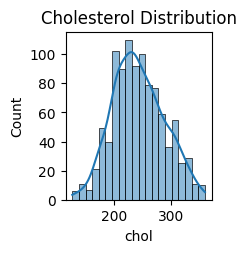

In [17]:
# Histogram
plt.subplot(2, 3, 1)
sns.histplot(df["chol"], bins=20, kde=True)
plt.title("Cholesterol Distribution")

Text(0.5, 1.0, 'Age vs Max Heart Rate')

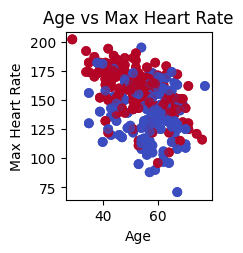

In [18]:
# Scatter Plot
plt.subplot(2, 3, 2)
plt.scatter(df["age"], df["thalach"], c=df["target"], cmap="coolwarm", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Age vs Max Heart Rate")

Text(0.5, 1.0, 'Patients With and Without Heart Disease')

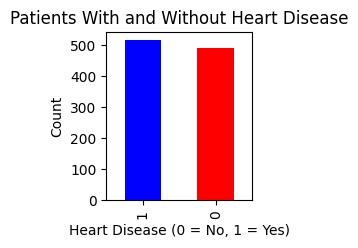

In [19]:
# Bar Chart
plt.subplot(2, 3, 3)
df["target"].value_counts().plot(kind="bar", color=["blue", "red"])
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Patients With and Without Heart Disease")

Text(0.5, 0.92, '3D Plot: Cholesterol, Age, and Heart Disease')

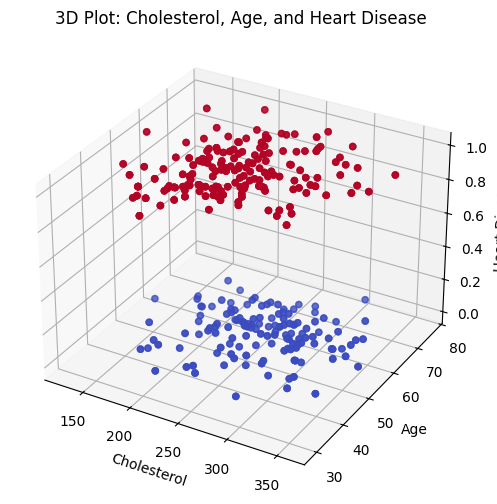

In [20]:
 
# 3D Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["chol"], df["age"], df["target"], c=df["target"], cmap="coolwarm")
ax.set_xlabel("Cholesterol")
ax.set_ylabel("Age")
ax.set_zlabel("Heart Disease")
plt.title("3D Plot: Cholesterol, Age, and Heart Disease")

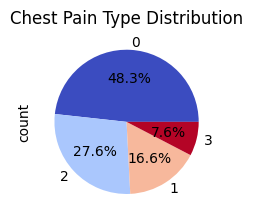

In [21]:
# Pie Chart
plt.subplot(2, 3, 5)
df["cp"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm")
plt.title("Chest Pain Type Distribution")
 
plt.tight_layout()
plt.show()